<h1 style="text-align:center">KLASIFIKASI 2 KELAS</h1> 

### Activation pada Dense

Setelah kita melakukan regresi menggunakan activation `relu` dan `linear`, pada pertemuan kali ini, kita akan mencoba melakukan klasifikasi menggunakan Dense dengan 2 jenis activation yang berbeda yaitu

1.   `sigmoid`
2.   `softmax`

Jika `linear` kita pergunakan untuk output yang berupa `float`, maka `sigmoid` dan `softmax` kita pergunakan untuk kasus klasifikasi dengan hasil dalam bentuk persentase.

# Sigmoid

`sigmoid` kita pergunakan jika kelas yang kita klasifikasikan/kategorikan hanya berjumlah 2 kelas saja. Istilah lainnya untuk kasus ini adalah kasus biner atau binary. Contohnya, kelas `ya` dan `tidak`, atau kelas `cowok` dan `cewek`, atau kelas `sehat` dan `sakit`, dan seterusnya. Tentu saja, kelas-kelas ini haruslah kita representasikan dalam bentuk `0` dan `1`.

# Persiapan Data

In [14]:
import pandas as pd

df = pd.read_csv("C:/Users/raffi/Downloads/Belajar_DL/Praktikum_DL/Pertemuan 2/Dataset/dataset_klasifikasi_biner.csv")
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.633563,0.357385,-0.503931,0.935066,0.647981,-0.050796,-1.933989,2.081684,0.041266,-0.258298,1
1,1.283905,1.109459,-0.908953,1.006586,0.492219,1.107295,1.243526,-0.172200,1.150359,0.147744,1
2,-0.966476,-0.593314,0.458020,1.032323,1.283685,-0.317640,1.499045,0.434477,0.423678,1.251380,1
3,2.429309,-1.306530,-1.869925,3.092164,2.028800,-0.879635,-0.393494,-0.101213,-1.624066,0.443553,1
4,-1.204798,0.078464,0.705181,0.224765,0.618707,1.534946,-0.302288,2.325055,0.495505,0.538133,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.606404,0.228927,0.959690,0.145821,0.682755,-0.927143,-0.280438,0.789222,-1.330100,-1.463687,0
9996,1.154048,-0.120265,-0.643621,-0.467386,-0.825604,0.725398,-1.439272,-1.132146,1.511610,-0.114986,0
9997,0.841468,-0.593749,-0.391671,-0.955036,-1.169619,0.683856,-1.629486,0.289335,-0.434358,-1.271335,0
9998,1.080252,-0.607761,-0.488605,-1.338506,-1.605447,-1.689724,0.202908,0.291496,0.827980,-1.069399,0


# Membagi Dataset

In [16]:
from sklearn.model_selection import train_test_split

x = df.drop('y', axis=1).values
y = df['y'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(8000, 10) (2000, 10) (8000,) (2000,)


# Membuat Arsitektur Model

In [38]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=32, input_dim=10, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

Kemudian mari kita siapkan JST dengan susunan `32-16-8-4-2` dan `1`. Perhatikan, pada layer terakhir kita beri nilai `Dense`-nya `1` dengan activation `sigmoid`.

# Compile Model

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 1065 (4.16 KB)
Trainable params: 1065 (4

Untuk kasus klasifikasi biner, kita bisa pergunakan `loss`-nya `binary_crossentropy`. Kemudian, selain `loss`, pada praktikum kali ini kita tambahkan satu lagi variabel `metrics` dengan isian `'accuracy'`, untuk mengetahui seberapa akurat otak kita.

# Training Model

In [40]:
note = model.fit(x_train, y_train, validation_split=0.2, batch_size=256, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 24ms/step - loss: 0.6861 - accuracy: 0.5348 - val_loss: 0.6765 - val_accuracy: 0.7131
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6555 - accuracy: 0.7780 - val_loss: 0.6321 - val_accuracy: 0.7831
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5924 - accuracy: 0.8197 - val_loss: 0.5599 - val_accuracy: 0.8219
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5130 - accuracy: 0.8492 - val_loss: 0.5006 - val_accuracy: 0.8594
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.4621 - accuracy: 0.8842 - val_loss: 0.4770 - val_accuracy: 0.8794
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4390 - accuracy: 0.9033 - val_loss: 0.4661 - val_accuracy: 0.8863
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4246 - accuracy: 0.9114 - val_loss: 0.4532 - val_accuracy: 0.9031
Epoch 8/100


# Plot Performa Model

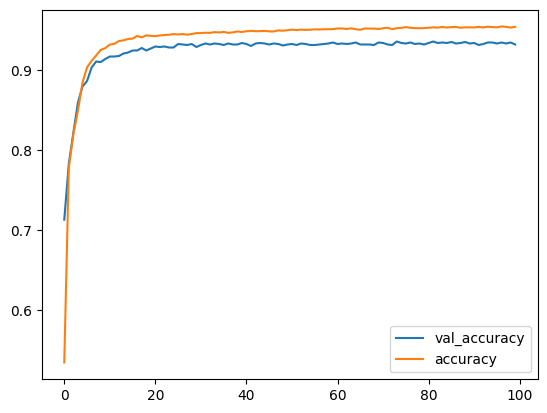

In [41]:
import matplotlib.pyplot as plt

plt.plot(range(len(note.history['val_accuracy'])), note.history['val_accuracy'], label='val_accuracy')
plt.plot(range(len(note.history['accuracy'])), note.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

# Evaluasi Model

In [42]:
loss, acc = model.evaluate(x_test, y_test)
print('accuracy model : ', acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.9275
accuracy model :  0.9275000095367432


In [ ]:
# accuracy score

# Prediksi Model

In [55]:
pred = model.predict(x_test)
pred

63/63 [==============================] - 0s 2ms/step


array([[0.04519183],
       [0.86859196],
       [0.00643411],
       ...,
       [0.86859196],
       [0.86859196],
       [0.86859196]], dtype=float32)

Untuk menormalisasikan ke dalam bentuk `0` dan `1`, maka kita perlu menambahkan baris kode sebagai berikut, yang intinya untuk segala nilai yang di atas $0.5$ akan kita rubah ke `kelas 1` dan untuk segala nilai yang di bawah $0.5$ akan kita rubah ke `kelas 0`.

In [56]:
pred = (pred > 0.5) * 1
pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

# Evaluasi dengan Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[913,  85],
       [ 60, 942]], dtype=int64)